In [45]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img_path = '../../data/images/creative_commons_elephant.jpg'

In [17]:
img = image.load_img(img_path, target_size = (224, 224))
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [18]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [19]:
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [20]:
from keras.applications.vgg16 import VGG16

In [21]:
model = VGG16(weights = 'imagenet')

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
preds = model.predict(x)

In [24]:
# get the position of largest value
np.argmax(preds[0]) 

386

#### Setting up the Grad-Cam algorithm

In [25]:
african_elephant_output = model.output[:, 386]

In [28]:
last_conv_layer = model.get_layer('block5_conv3')

In [29]:
from keras import backend as K

In [33]:
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

In [48]:
grads.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(512)])

In [35]:
pooled_grads = K.mean(grads, axis = (0, 1, 2))

In [36]:
iterate = K.function([model.input], 
                    [pooled_grads, last_conv_layer.output[0]])

In [38]:
pooled_grads_value, conv_layer_output_value = iterate([x])

In [40]:
pooled_grads_value.shape

(512,)

In [41]:
conv_layer_output_value.shape

(14, 14, 512)

In [56]:
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis = -1)

In [57]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap.shape

(14, 14)

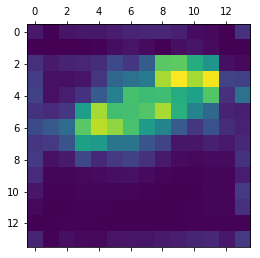

In [58]:
plt.matshow(heatmap)